<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [54]:
import warnings
warnings.filterwarnings('ignore')

### Gensim LDA Topic Model

In [13]:
import pandas as pd

data_url = r'./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

df = pd.read_csv(data_url).drop(columns=['id', 'dateAdded', 'dateUpdated', 'asins', 'brand',
                                         'categories', 'primaryCategories', 'imageURLs',
                                         'keys', 'reviews.didPurchase', 'reviews.doRecommend',
                                         'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs',
                                         'sourceURLs', 'name', 'manufacturer', 'manufacturerNumber',
                                         'reviews.date', 'reviews.dateSeen'])

In [14]:
df.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [24]:
import numpy as np
import gensim
import os
import re

from gensim.utils import smart_open, simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]
df['tokens'] = df['reviews.text'].apply(tokenize)

In [29]:
id2word = corpora.Dictionary(df['tokens'])
corpus = [id2word.doc2bow(text) for text in df['tokens']]

In [55]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 20,
                   passes=10,
                   workers=4
                  )

In [31]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [32]:
topics = [' '.join(t[2:5]) for t in words]

In [34]:
topics[:10]

['value price far',
 'kids friendly loves',
 'apps kindle play',
 'love use easy',
 'bought product dropped',
 'kindle great screen',
 'price long brand',
 'box long time',
 'loves tablet bought',
 'read tablet bought']

### Select appropriate number of topics

In [ ]:
path = r'./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

In [ ]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            tokens = tokenize(str(text))
            yield tokens

In [56]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=df['tokens'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

In [45]:
coherence_values

[0.26175680397493006,
 0.28779657943635056,
 0.2868663317291314,
 0.3128099814538669,
 0.2789114287054009,
 0.29347819709219053,
 0.3004616684858593]

### Create some dope visualization of the topics

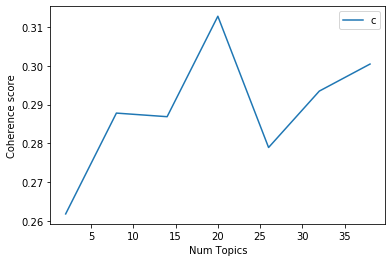

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [59]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.257948 -0.010260       1        1  13.636676
2      0.092939 -0.042308       2        1   7.895866
18    -0.230575  0.160055       3        1   7.125963
8      0.224467  0.043148       4        1   7.105641
17    -0.042541 -0.246005       5        1   6.683172
16     0.084919 -0.100390       6        1   5.855348
19    -0.062878  0.023043       7        1   5.835813
12     0.194040  0.013208       8        1   5.285086
11    -0.019936 -0.053666       9        1   4.234869
3     -0.003119 -0.107053      10        1   4.054302
15    -0.059423 -0.050755      11        1   3.987902
13    -0.212510  0.145924      12        1   3.858798
14     0.204345  0.067005      13        1   3.830517
5      0.010069 -0.076702      14        1   3.626698
4     -0.151628 -0.061204      15        1   3.286376
9      0.128478  0.177465      16        1   2.994782
0      0.027710 -0.027368      17        1   2.930240
10    -0.006958 -0.060164      18        1   2.806175
7      0.035511  0.199247      19        1   2.735628
1      0.045036  0.006780      20        1   2.230150, topic_info=     Category         Freq        Term        Total  loglift  logprob
19    Default  7170.000000   batteries  7170.000000  30.0000  30.0000
22    Default  8763.000000       great  8763.000000  29.0000  29.0000
3157  Default  3139.000000      kindle  3139.000000  28.0000  28.0000
2616  Default  2248.000000       loves  2248.000000  27.0000  27.0000
18    Default  4812.000000       price  4812.000000  26.0000  26.0000
30    Default  2325.000000         buy  2325.000000  25.0000  25.0000
35    Default  5507.000000        good  5507.000000  24.0000  24.0000
4197  Default  6690.000000      tablet  6690.000000  23.0000  23.0000
235   Default  1475.000000        best  1475.000000  22.0000  22.0000
10    Default  2222.000000        work  2222.000000  21.0000  21.0000
3173  Default  1494.000000       books  1494.000000  20.0000  20.0000
202   Default  2547.000000        kids  2547.000000  19.0000  19.0000
2050  Default  1868.000000        apps  1868.000000  18.0000  18.0000
174   Default  1896.000000     product  1896.000000  17.0000  17.0000
902   Default  2884.000000        easy  2884.000000  16.0000  16.0000
605   Default  2124.000000         old  2124.000000  15.0000  15.0000
29    Default  3122.000000      bought  3122.000000  14.0000  14.0000
93    Default  3456.000000        love  3456.000000  13.0000  13.0000
108   Default  1787.000000        year  1787.000000  12.0000  12.0000
2245  Default  1651.000000      screen  1651.000000  11.0000  11.0000
1615  Default  1013.000000    daughter  1013.000000  10.0000  10.0000
99    Default  1408.000000       works  1408.000000   9.0000   9.0000
97    Default  4347.000000         use  4347.000000   8.0000   8.0000
1059  Default  1026.000000        gift  1026.000000   7.0000   7.0000
772   Default  1718.000000       games  1718.000000   6.0000   6.0000
24    Default  2360.000000        long  2360.000000   5.0000   5.0000
21    Default  1213.000000       brand  1213.000000   4.0000   4.0000
2667  Default   851.000000        ipad   851.000000   3.0000   3.0000
76    Default   829.000000      brands   829.000000   2.0000   2.0000
3     Default  2101.000000     battery  2101.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1485  Topic20    15.418506     reached    20.407333   3.5228  -6.1349
751   Topic20    73.796959   wonderful   161.184875   3.0219  -4.5691
673   Topic20    20.299971  individual    30.227516   3.4050  -5.8598
1218  Topic20    29.122656      helped    48.889725   3.2851  -5.4989
475   Topic20    75.743767       touch   182.736633   2.9224  -4.5431
1052  Topic20    81.039436        help   204.629181   2.8768  -4.4755
956   Topic20    25.859806          ad    42.306793   3.3108  -5.6177
187   Topic20    61.044632         fit 

In [50]:
!pip install wordcloud

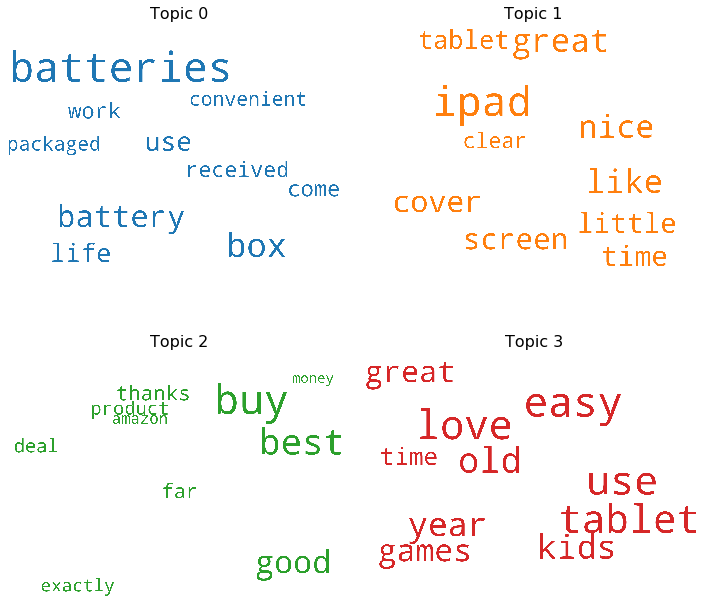

In [60]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Write a few bullets on your findings in markdown at the end

- Best # of topics seems to be ~20.
- Topics seem to be clustered on different items and positive/negative reviews
- Still unclear on the concepts behind coherence values

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling